#  Advertisement data sets 

## In this we need to predict the sale on the basis of features given below

* TV
* radio
* newspaper

## Response variable 


* sales

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')

In [8]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
data.shape

(200, 5)

In [10]:
import seaborn as sns

%matplotlib inline

/home/aksha/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


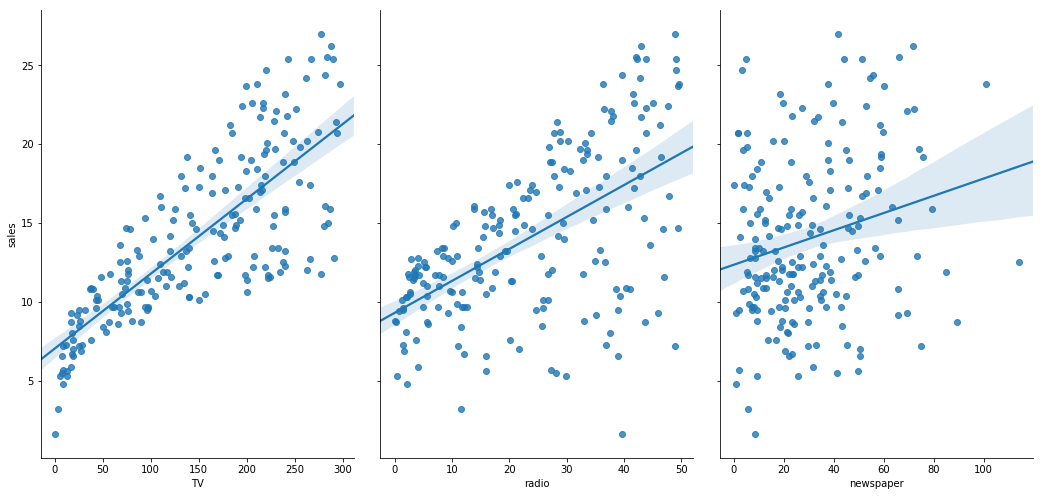

In [11]:
#visualize the features variable wuth response variable with scatter plot 

sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')

In [12]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

### Creating X and y

In [13]:
#creting pythpn list for feature name 
feature_cols = ['TV', 'radio', 'newspaper']

#use the list to create the subset of the original dataframe 
X = data[feature_cols]


In [14]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
type(X)

pandas.core.frame.DataFrame

In [16]:
y = data['sales']

In [17]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

## Spliting the X and y as training and test sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Linear Regression in scikit-learn

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linreg = LinearRegression()

In [35]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Interpretting model Co-effiencients 

In [24]:
print(linreg.intercept_)
print(linreg.coef_)

2.321659768462265
[0.04845922 0.1891102  0.00074287]


In [25]:
feature_cols, linreg.coef_

(['TV', 'radio', 'newspaper'], array([0.04845922, 0.1891102 , 0.00074287]))

Important note :
* This is the statement of association not causation
* if increase in Tv ad would decrese in sale , then beta1 would be negative

## Three common evaluation metrics for the Linear regression problem
* Mean absolute error(MAE)
* Mean squared error(MSE)
* Root mean squared error(RMSE)

In [26]:
from sklearn import metrics

### Compairing error evaluation
* MAE : easiest to understand beacause it uses mean error
* MSE : more popular than MAE because it punishes larger error
* RMSE : even more popular because it inyerpreted as y unit 

In [33]:
import numpy as np

In [36]:
y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.600921481800255

## Feature selection 

In [37]:
feature_cols = ['TV', 'radio']
X =  data[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_pred, y_test))

1.5825450185328718

removing newspaper column decreases the error 